In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split


In [2]:

# Load the CSV file
file_path = 'creditcard.csv' 
df = pd.read_csv(file_path)

In [3]:

# Check for missing data
missing_data = df.isnull().sum()

# Display the count of missing values for each column
print("Missing Data:")
print(missing_data) 

Missing Data:
id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [11]:

# Calculate the total number of transactions
total_transactions = len(df)

# Count the number of fraudulent and non-fraudulent transactions
fraudulent_transactions = df['Class'].sum()  # Assuming 1 represents fraudulent
non_fraudulent_transactions = total_transactions - fraudulent_transactions

# Calculate the percentages
fraudulent_percentage = (fraudulent_transactions / total_transactions) * 100
non_fraudulent_percentage = (non_fraudulent_transactions / total_transactions) * 100

# Print the results
print("Percentage of fraudulent transactions:", fraudulent_percentage)
print("Percentage of non-fraudulent transactions:", non_fraudulent_percentage)

Percentage of fraudulent transactions: 50.0
Percentage of non-fraudulent transactions: 50.0


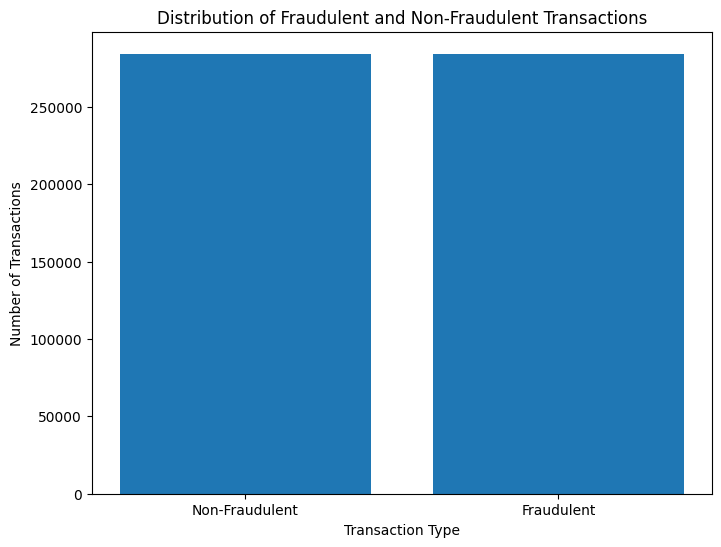

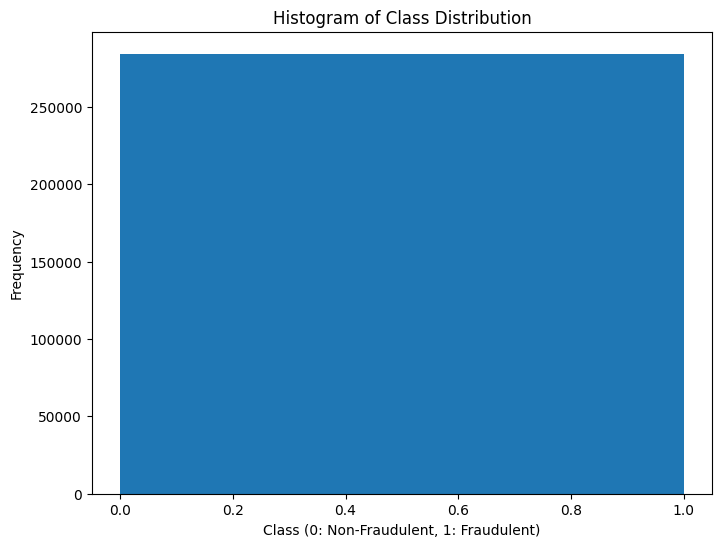

In [12]:

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(['Non-Fraudulent', 'Fraudulent'], df['Class'].value_counts())
plt.title("Distribution of Fraudulent and Non-Fraudulent Transactions")
plt.xlabel("Transaction Type")
plt.ylabel("Number of Transactions")
plt.show()

# Create a histogram
plt.figure(figsize=(8, 6))
plt.hist(df['Class'], bins=2)  # Two bins for binary classification
plt.title("Histogram of Class Distribution")
plt.xlabel("Class (0: Non-Fraudulent, 1: Fraudulent)")
plt.ylabel("Frequency")
plt.show()

Balanced Classes: If your classes are roughly equal in size, random sampling is generally appropriate.


In [4]:

# Remove duplicate rows
df = df.drop_duplicates()

# Set the desired number of rows to keep
desired_rows = 120000  # Adjust as needed almost 20%

# Randomly sample the specified number of rows
df_sampled = df.sample(n=desired_rows, random_state=42)  # Set a random state for reproducibility

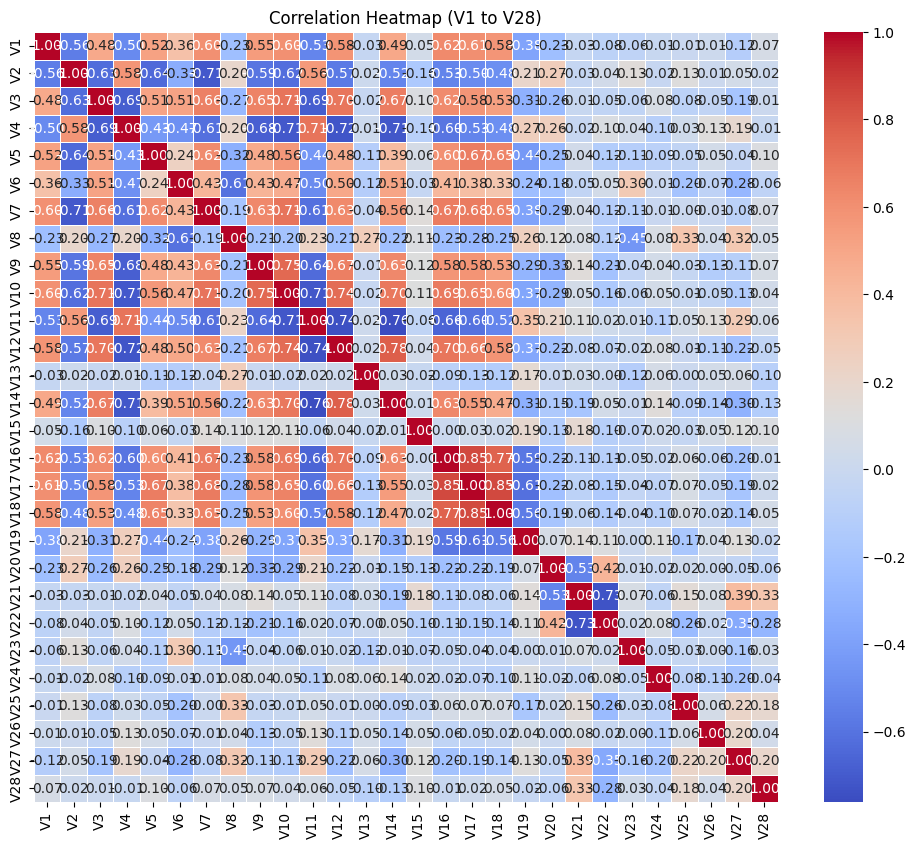

In [5]:

# Select only the columns V1 to V28 for correlation analysis
selected_columns = df_sampled.loc[:, 'V1':'V28']
# Calculate correlation matrix
correlation_matrix = selected_columns.corr()

# Create a heatmap to visualize correlations
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap (V1 to V28)')
plt.show()

In [6]:

# Identify highly correlated features
threshold = 0.8  # Set your correlation threshold
highly_correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            highly_correlated_features.add(colname)

# Exclude 'id' and 'Class' from dropping
highly_correlated_features -= {'id', 'Class', 'Amount'}

# Display highly correlated features
print("Highly Correlated Features:", list(highly_correlated_features))


Highly Correlated Features: ['V18', 'V17']


In [7]:

# Use SelectKBest to choose the best features based on ANOVA F-value
k_best = 20  # Set the number of best features to select
feature_selector = SelectKBest(f_classif, k=k_best)

# Fit the feature selector to the data
X = selected_columns
y = df_sampled['Class']  # Assuming 'Class' is the target variable
X_best = feature_selector.fit_transform(X, y)

# Get the selected features
selected_features = X.columns[feature_selector.get_support()]

# Display the selected features
print("Selected Features:", list(selected_features))


Selected Features: ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18', 'V19', 'V20', 'V24', 'V27']


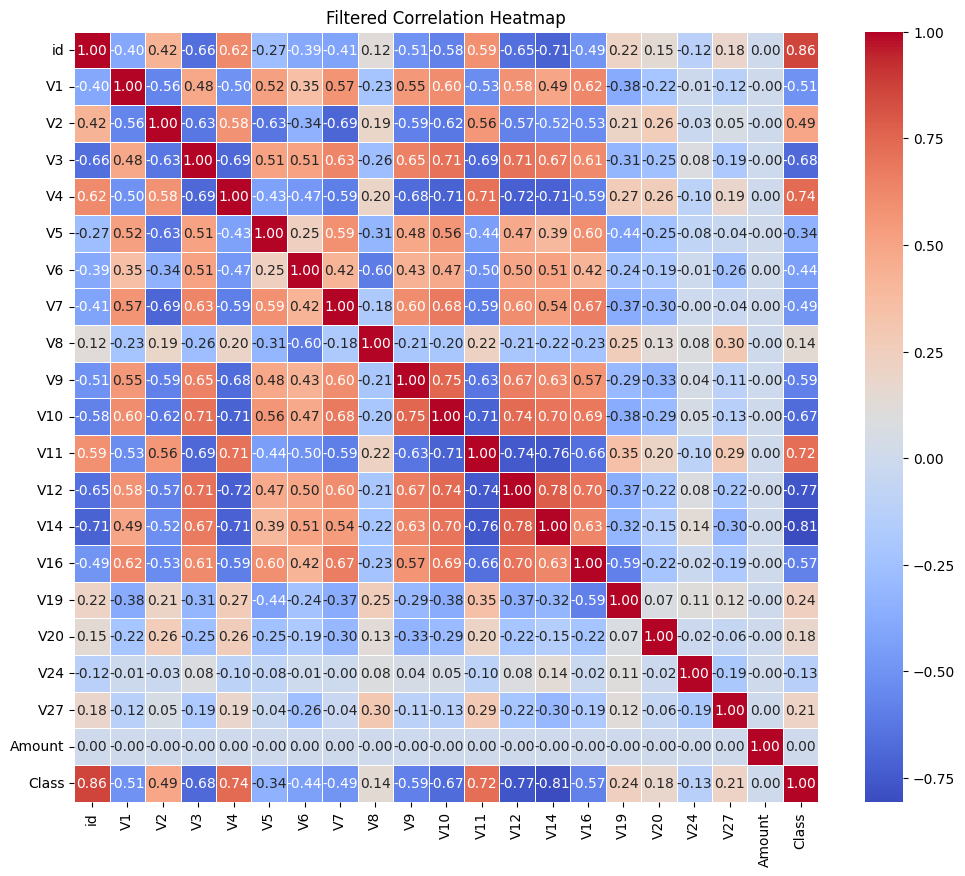

In [8]:

# Drop highly correlated and unselected features from the DataFrame
features_to_drop = highly_correlated_features.union(set(X.columns) - set(selected_features))
df_filtered = df.drop(columns=features_to_drop)

# Calculate correlation matrix for the filtered DataFrame
filtered_correlation_matrix = df_filtered.corr()

# Create a heatmap to visualize correlations of the filtered DataFrame
plt.figure(figsize=(12, 10))
sns.heatmap(filtered_correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)
plt.title('Filtered Correlation Heatmap')
plt.show()


In [10]:

# Calculate the total number of transactions
total_transactions = len(df_sampled)

# Count the number of fraudulent and non-fraudulent transactions
fraudulent_transactions = df_sampled['Class'].sum()  # Assuming 1 represents fraudulent
non_fraudulent_transactions = total_transactions - fraudulent_transactions

# Calculate the percentages
fraudulent_percentage = (fraudulent_transactions / total_transactions) * 100
non_fraudulent_percentage = (non_fraudulent_transactions / total_transactions) * 100

# Print the results
print("Percentage of fraudulent transactions:", fraudulent_percentage)
print("Percentage of non-fraudulent transactions:", non_fraudulent_percentage)

Percentage of fraudulent transactions: 50.035
Percentage of non-fraudulent transactions: 49.964999999999996


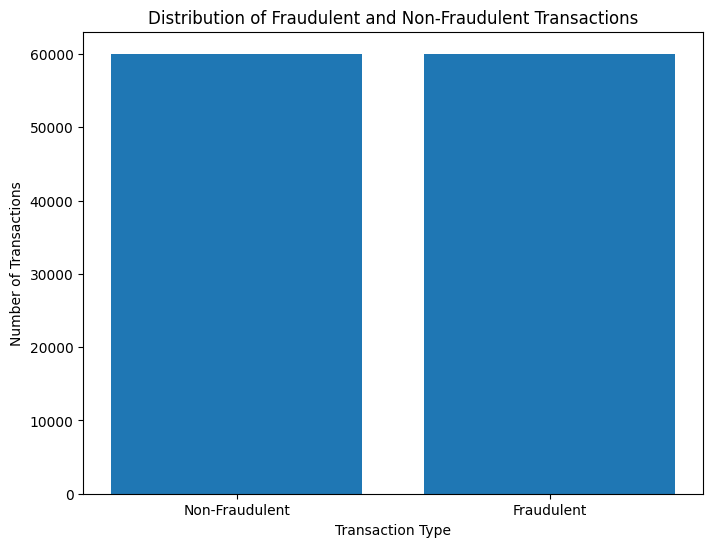

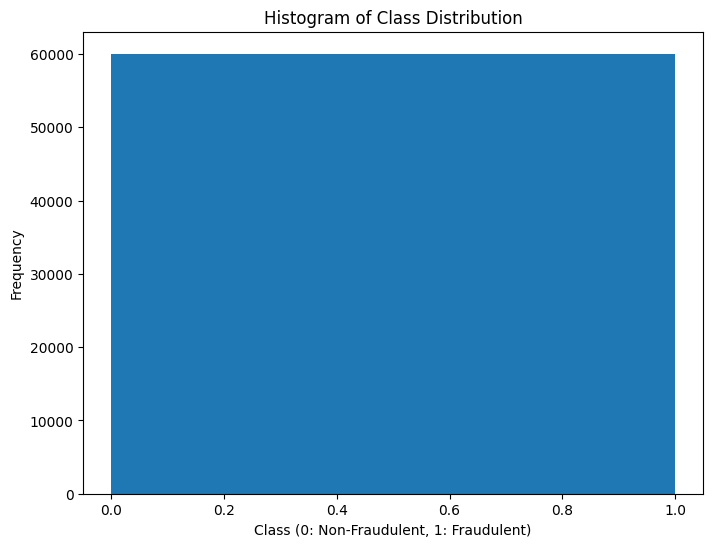

In [13]:

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(['Non-Fraudulent', 'Fraudulent'], df_sampled['Class'].value_counts())
plt.title("Distribution of Fraudulent and Non-Fraudulent Transactions")
plt.xlabel("Transaction Type")
plt.ylabel("Number of Transactions")
plt.show()

# Create a histogram
plt.figure(figsize=(8, 6))
plt.hist(df_sampled['Class'], bins=2)  # Two bins for binary classification
plt.title("Histogram of Class Distribution")
plt.xlabel("Class (0: Non-Fraudulent, 1: Fraudulent)")
plt.ylabel("Frequency")
plt.show()

In [ ]:
X = df_sampled.drop("Class", axis=1)
y = df_sampled["Class"]
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split the testing set into testing and validation
X_test, X_val, y_test, y_val = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42)
